# Combining Datasets: Merge and Join

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

* Một tính năng thiết yếu được cung cấp bởi Pandas là hoạt động kết hợp và kết hợp trong bộ nhớ, hiệu suất cao. Nếu bạn đã từng làm việc với cơ sở dữ liệu, bạn nên quen thuộc với kiểu tương tác dữ liệu này. Giao diện chính của hàm này là hàm pd.merge và chúng ta sẽ thấy một vài ví dụ về cách thức hoạt động của hàm này trong thực tế.

In [2]:
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Categories of Joins

* Hàm pd.merge () thực hiện một số kiểu nối: phép nối một-một, nhiều-một và nhiều-nhiều. Tất cả ba loại liên kết được truy cập thông qua một lệnh gọi giống hệt nhau đến giao diện pd.merge (); kiểu nối được thực hiện phụ thuộc vào dạng dữ liệu đầu vào. Ở đây chúng tôi sẽ đưa ra các ví dụ đơn giản về ba loại hợp nhất và thảo luận thêm về các tùy chọn chi tiết bên dưới.

### One-to-one joins

* Có lẽ kiểu thử nghiệm hợp nhất đơn giản nhất là phép nối một-một, về nhiều mặt rất giống với phép nối theo cột được thấy trong Kết hợp các tập dữ liệu: Concat & Append. Ví dụ cụ thể, hãy xem xét hai DataFrames sau chứa thông tin về một số nhân viên trong một công ty:

In [3]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [4]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### Many-to-one joins

* Các phép nối nhiều-một là phép nối trong đó một trong hai cột chính chứa các mục trùng lặp. Đối với trường hợp nhiều-một, DataFrame kết quả sẽ bảo toàn các mục trùng lặp đó nếu thích hợp. Hãy xem xét ví dụ sau về phép nối nhiều-một:

In [12]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

### Many-to-many joins

In [11]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


# Specification of the Merge Key

* Chúng tôi đã thấy hành vi mặc định của pd.merge (): nó tìm kiếm một hoặc nhiều tên cột phù hợp giữa hai đầu vào và sử dụng điều này làm khóa. Tuy nhiên, thường thì các tên cột sẽ không khớp quá đẹp và pd.merge () cung cấp nhiều tùy chọn để xử lý điều này.

### The on keyword

In [14]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

* Tùy chọn này chỉ hoạt động nếu cả DataFrames bên trái và bên phải đều có tên cột được chỉ định.

### The left_on and right_on keywords

* Đôi khi bạn có thể muốn hợp nhất hai tập dữ liệu với các tên cột khác nhau; ví dụ: chúng tôi có thể có một tập dữ liệu trong đó tên nhân viên được gắn nhãn là "name" chứ không phải "nhân viên". Trong trường hợp này, chúng ta có thể sử dụng từ khóa left_on và right_on để chỉ định hai tên cột:

In [15]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

* Kết quả có một cột dư thừa mà chúng ta có thể loại bỏ nếu muốn – ví dụ: bằng cách sử dụng phương thức drop () của DataFrames:

In [16]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### The left_index and right_index keywords

* Đôi khi, thay vì hợp nhất trên một cột, bạn muốn hợp nhất trên một chỉ mục. Ví dụ: dữ liệu của bạn có thể trông như thế này:"

In [17]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')


,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


* Bạn có thể sử dụng chỉ mục làm khóa để hợp nhất bằng cách chỉ định cờ left_index và / hoặc right_index trong pd.merge ():

In [18]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")


,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


* Để thuận tiện, DataFrames triển khai phương thức join (), phương thức này thực hiện hợp nhất mặc định là kết hợp trên các chỉ số:

In [19]:
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


* Nếu bạn muốn kết hợp các chỉ số và cột, bạn có thể kết hợp left_index với right_on hoặc left_on với right_index để có được hành vi mong muốn:

In [20]:
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

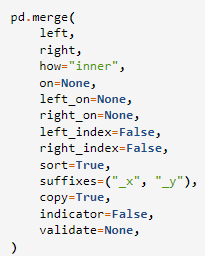

## Specifying Set Arithmetic for Joins

In [21]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

* Ở đây chúng tôi đã hợp nhất hai tập dữ liệu chỉ có một mục "tên" chung duy nhất: Mary. Theo mặc định, kết quả chứa giao của hai bộ đầu vào; đây là những gì được gọi là liên kết bên trong. Chúng tôi có thể chỉ định điều này một cách rõ ràng bằng cách sử dụng từ khóa how, mặc định là "bên trong":

In [22]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


* Other options for the how keyword are 'outer', 'left', and 'right'. An outer join returns a join over the union of the input columns, and fills in all missing values with NAs:

In [23]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

* The left join and right join return joins over the left entries and right entries, respectively. For example:

In [24]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

## Overlapping Column Names: The suffixes Keyword

In [25]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

* Bởi vì đầu ra sẽ có hai tên cột xung đột, hàm hợp nhất sẽ tự động thêm hậu tố _x hoặc _y để làm cho các cột đầu ra là duy nhất. Nếu các giá trị mặc định này không phù hợp, bạn có thể chỉ định một hậu tố tùy chỉnh bằng cách sử dụng từ khóa các hậu tố:

In [26]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

# Example: US States Data

* Một ví dụ về một số dữ liệu về các tiểu bang của Hoa Kỳ và dân số của họ. https://github.com/jakevdp/data-USstates/

In [27]:
# Following are shell commands to download the data
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

In [28]:
pop = pd.read_csv('dataset/state-population.csv')
areas = pd.read_csv('dataset/state-areas.csv')
abbrevs = pd.read_csv('dataset/state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

* Với thông tin này, giả sử chúng tôi muốn tính toán một kết quả tương đối đơn giản: xếp hạng các tiểu bang và vùng lãnh thổ của Hoa Kỳ theo mật độ dân số năm 2010 của chúng. Chúng tôi rõ ràng có dữ liệu ở đây để tìm kết quả này, nhưng chúng tôi sẽ phải kết hợp các bộ dữ liệu để tìm ra kết quả.

Chúng tôi sẽ bắt đầu với hợp nhất nhiều-một sẽ cung cấp cho chúng tôi tên tiểu bang đầy đủ trong DataFrame dân số. Chúng tôi muốn hợp nhất dựa trên cột trạng thái / khu vực của cửa sổ bật lên và cột viết tắt của chữ viết tắt. Chúng tôi sẽ sử dụng how='outer' để đảm bảo không có dữ liệu nào bị loại bỏ do các nhãn không khớp.

In [35]:
merged = pd.merge(abbrevs, pop, how='outer', left_on='abbreviation', right_on='state/region').drop('abbreviation', axis=1)

In [36]:
merged.head()

,state,state/region,ages,year,population
0,Alabama,AL,under18,2012,1117489.0
1,Alabama,AL,total,2012,4817528.0
2,Alabama,AL,under18,2010,1130966.0
3,Alabama,AL,total,2010,4785570.0
4,Alabama,AL,under18,2011,1125763.0


* Hãy kiểm tra kỹ xem có bất kỳ sự không khớp nào ở đây hay không, điều này chúng ta có thể thực hiện bằng cách tìm kiếm các hàng có giá trị rỗng:

In [37]:
merged.isnull().any()

state            True
state/region    False
ages            False
year            False
population       True
dtype: bool

* Một số thông tin dân số là trống; chúng ta hãy tìm ra đó là những gì!

In [39]:
merged[merged['population'].isnull()].head()

,state,state/region,ages,year,population
2448,NaN,PR,under18,1990,NaN
2449,NaN,PR,total,1990,NaN
2450,NaN,PR,total,1991,NaN
2451,NaN,PR,under18,1991,NaN
2452,NaN,PR,total,1993,NaN


* Có vẻ như tất cả các giá trị dân số rỗng là từ Puerto Rico trước năm 2000; điều này có thể do dữ liệu này không có sẵn từ nguồn ban đầu.

* Quan trọng hơn, chúng tôi cũng thấy rằng một số mục nhập trạng thái mới cũng là null, có nghĩa là không có mục nhập tương ứng trong khóa viết tắt! Hãy tìm ra những khu vực nào thiếu kết quả phù hợp này:

In [41]:
# lọc ra các state/region mà có state = null;
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

* Chúng tôi có thể nhanh chóng suy ra vấn đề: dữ liệu dân số của chúng tôi bao gồm các mục nhập cho Puerto Rico (PR) và Hoa Kỳ nói chung (Hoa Kỳ), trong khi các mục nhập này không xuất hiện trong khóa viết tắt của tiểu bang. Chúng tôi có thể khắc phục những lỗi này một cách nhanh chóng bằng cách điền vào các mục thích hợp:

In [42]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state           False
state/region    False
ages            False
year            False
population       True
dtype: bool

* Không còn giá trị rỗng trong cột trạng thái: chúng ta đã hoàn tất!

Bây giờ chúng ta có thể hợp nhất kết quả với dữ liệu vùng bằng một thủ tục tương tự. Kiểm tra kết quả của chúng tôi, chúng tôi sẽ muốn tham gia vào cột trạng thái trong cả hai:

In [51]:
# dùng on khi 2 trường cùng tên
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state,state/region,ages,year,population,area (sq. mi)
0,Alabama,AL,under18,2012,1117489.0,52423.0
1,Alabama,AL,total,2012,4817528.0,52423.0
2,Alabama,AL,under18,2010,1130966.0,52423.0
3,Alabama,AL,total,2010,4785570.0,52423.0
4,Alabama,AL,under18,2011,1125763.0,52423.0


In [53]:
final.isnull().any()

state            False
state/region     False
ages             False
year             False
population        True
area (sq. mi)     True
dtype: bool

* Có null trong cột khu vực; chúng ta có thể xem xét những vùng nào đã bị bỏ qua ở đây:

In [54]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

* Chúng tôi thấy rằng các khu vực của chúng tôi DataFrame không bao gồm toàn bộ khu vực của Hoa Kỳ. Chúng tôi có thể chèn giá trị thích hợp (ví dụ: bằng cách sử dụng tổng của tất cả các khu vực tiểu bang), nhưng trong trường hợp này, chúng tôi sẽ chỉ bỏ giá trị rỗng vì mật độ dân số của toàn bộ Hoa Kỳ không liên quan đến cuộc thảo luận hiện tại của chúng tôi:

In [59]:
final.dropna(inplace=True)
final.head()

,state,state/region,ages,year,population,area (sq. mi)
0,Alabama,AL,under18,2012,1117489.0,52423.0
1,Alabama,AL,total,2012,4817528.0,52423.0
2,Alabama,AL,under18,2010,1130966.0,52423.0
3,Alabama,AL,total,2010,4785570.0,52423.0
4,Alabama,AL,under18,2011,1125763.0,52423.0


In [60]:
final.isnull().sum()

state            0
state/region     0
ages             0
year             0
population       0
area (sq. mi)    0
dtype: int64

* Bây giờ chúng tôi có tất cả dữ liệu chúng tôi cần. Để trả lời câu hỏi quan tâm, trước tiên chúng ta hãy chọn phần dữ liệu tương ứng với năm 2000 và tổng dân số. Chúng tôi sẽ sử dụng hàm query () để thực hiện việc này một cách nhanh chóng (điều này yêu cầu gói sốxpr phải được cài đặt; xem Pandas hiệu suất cao: eval () và query ()):

In [61]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state,state/region,ages,year,population,area (sq. mi)
3,Alabama,AL,total,2010,4785570.0,52423.0
91,Alaska,AK,total,2010,713868.0,656425.0
101,Arizona,AZ,total,2010,6408790.0,114006.0
189,Arkansas,AR,total,2010,2922280.0,53182.0
197,California,CA,total,2010,37333601.0,163707.0


* Bây giờ chúng ta hãy tính toán mật độ dân số và hiển thị nó theo thứ tự. Chúng tôi sẽ bắt đầu bằng cách lập chỉ mục lại dữ liệu của chúng tôi về trạng thái, sau đó tính toán kết quả:

In [62]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [63]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

Kết quả là bảng xếp hạng các tiểu bang của Hoa Kỳ cộng với Washington, DC và Puerto Rico theo thứ tự mật độ dân số năm 2010 của chúng, tính theo số cư dân trên một dặm vuông. Chúng ta có thể thấy rằng cho đến nay khu vực dày đặc nhất trong tập dữ liệu này là Washington, DC (tức là Đặc khu Columbia); trong số các tiểu bang, mật độ dày đặc nhất là New Jersey.

Chúng tôi cũng có thể kiểm tra phần cuối của danh sách:

In [64]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64